<a href="https://colab.research.google.com/github/ifelsejet/pokeML/blob/main/PokeML_DenseNet301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import sklearn
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import random
from tensorflow.keras import layers
import sys
from google.colab import files
#import imghdr
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import DenseNet201
from tensorflow.python.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


Load Dataset From Google Drive

In [ ]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# return number of folders in dataset
print(len(os.listdir('/content/drive/MyDrive/dataset')))
# return number of images in a folder
print(len(os.listdir('/content/drive/MyDrive/dataset/NidoranM')))

151
200


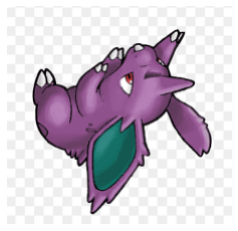

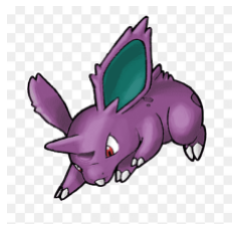

In [ ]:

'''
with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt') # downloading files from Drive
'''
path = '/content/drive/MyDrive/dataset/NidoranM/'
imgTest = ''
for img in os.listdir(path):
  #print(img)
  imgTest = img
imgSaveTest = mpimg.imread(path+"/"+imgTest)
#print(imgSaveTest)
fig = plt.figure()
#plt.axis('off')
plt.axis("off")   # turns off axes
#plt.axis("tight")  # gets rid of white border
#plt.axis("image")  # square up the image instead of filling the "figure" space
#fig.axes.get_xaxis().set_visible(False)
#fig.axes.get_yaxis().set_visible(False)
#plt.subplot(n,n,1)
imgAlterTest = tf.image.flip_up_down(imgSaveTest)
plt.imshow(imgAlterTest)
#plt.savefig(path+"/"+ "imgAlterTestFlipUpDowAHHN.png",bbox_inches='tight',pad_inches = 0)
fig = plt.figure()
plt.axis("off") 
flippedLR = tf.image.flip_left_right(imgSaveTest)
plt.imshow(flippedLR)
#plt.savefig(path+"/"+ "imgAlterTestFlipLeftRight.png",bbox_inches='tight',pad_inches = 0)
#plt.savefig(path+"/"+ "imgAlterTestFlipUpDowN.png",bbox_inches='tight',pad_inches = 0)
#files.download(path+imgTest)




In [ ]:
# Augment Data for each pokemon that has under 60 images
'''
data_augmentation = tf.keras.Sequential([
                            layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                            layers.experimental.preprocessing.RandomRotation((-0.2, 0.3))
])
path = '/content/drive/MyDrive/dataset/NidoranM'
#image, label = next(iter(os.listdir('/content/drive/MyDrive/dataset/NidoranM'))
n = 9
cnt = 0
#TODO: Iterate over all labels, then create 250x250 plt figures
#of all pokemons, then save it locally (Pokemon_AugmentType_CNT?.png)

for img in os.listdir(path):
  #print(img) 
  cnt += 1
  image = mpimg.imread(path+"/"+img)
  #print(image)
  fig = plt.figure()
  plt.subplot(n,n,1)
  plt.title('Original image')
  plt.imshow(image)

  plt.subplot(n,n,2)
  plt.title('Augmented image  (Left -> Right)')
  #plt.imshow(augmented)
  flippedLR = tf.image.flip_left_right(image)
  plt.imshow(flippedLR)
  plt.subplot(n,n,3)
  plt.title('Augmented image  (Up -> Down)')
  #plt.imshow(augmented)
  flippedUD = tf.image.flip_up_down(image)
  plt.imshow(flippedUD)
  plt.subplot(n,n,4)
  plt.title('Augmented image  (Rotate90)')
  #plt.imshow(augmented)
  rotated = tf.image.rot90(image)
  plt.imshow(rotated)
  plt.subplot(n,n,5)
  plt.title('Augmented image  (Rotate180)')
  #plt.imshow(augmented)
  rotated180 = tf.image.rot90(tf.image.rot90(image))
  plt.imshow(rotated180)
  plt.subplot(n,n,6)
  plt.title('Augmented image  (Rotate270)')
  #plt.imshow(augmented)
  rotated270 = tf.image.rot90(tf.image.rot90(tf.image.rot90(image)))
  plt.imshow(rotated270)
  plt.subplot(n,n,7)
  plt.title('Augmented image  (Rotate90 + Flip U/D)')
  #plt.imshow(augmented)
  rotateflipUD = tf.image.rot90(tf.image.flip_up_down(image))
  plt.imshow(rotateflipUD)
  plt.subplot(n,n,8)
  plt.title('Augmented image  (Rotate90 + Flip L/R)')
  #plt.imshow(augmented)
  rotateflip90LR = tf.image.rot90(tf.image.flip_left_right(image))
  plt.imshow(rotateflip90LR)
  plt.subplot(n,n,9)
  plt.title('Augmented image  (Flip L/R + U/D)')
  #plt.imshow(augmented)
  flipLRUD = tf.image.flip_left_right(tf.image.flip_up_down(image))
  plt.imshow(flipLRUD)
  #plt.savefig("Test Save " + str(cnt) + ".png")
  #visualize(image, flipped)
  #plt.figure(figsize = (10,10))
  #print(image)
  #plt.imshow(image)
  #plt.show()
#exampleImg = cv2.imread('/content/drive/MyDrive/dataset/NidoranM/nnnn.png')
#plt.imshow(exampleImg)
#plt.show()
'''

'\ndata_augmentation = tf.keras.Sequential([\n                            layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),\n                            layers.experimental.preprocessing.RandomRotation((-0.2, 0.3))\n])\npath = \'/content/drive/MyDrive/dataset/NidoranM\'\n#image, label = next(iter(os.listdir(\'/content/drive/MyDrive/dataset/NidoranM\'))\nn = 9\ncnt = 0\n#TODO: Iterate over all labels, then create 250x250 plt figures\n#of all pokemons, then save it locally (Pokemon_AugmentType_CNT?.png)\n\nfor img in os.listdir(path):\n  #print(img) \n  cnt += 1\n  image = mpimg.imread(path+"/"+img)\n  #print(image)\n  fig = plt.figure()\n  plt.subplot(n,n,1)\n  plt.title(\'Original image\')\n  plt.imshow(image)\n\n  plt.subplot(n,n,2)\n  plt.title(\'Augmented image  (Left -> Right)\')\n  #plt.imshow(augmented)\n  flippedLR = tf.image.flip_left_right(image)\n  plt.imshow(flippedLR)\n  plt.subplot(n,n,3)\n  plt.title(\'Augmented image  (Up -> Down)\')\n  #plt.imshow

Get labels (folder names)


In [ ]:
labels = os.listdir('/content/drive/MyDrive/dataset')
# pLables = ['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Eevee', 'Ekans', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Koffing', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Muk', 'Nidoking', 'NidoranF', 'NidoranM', 'Nidorina', 'Ninetales', 'Omanyte', 'Omastar', 'Onix', 'Paras', 'Parasect', 'Persian', 'Pidgeot', 'Pidgeotto', 'Pidgey', 'Pinsir', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Ponyta', 'Primeape', 'Rapidash', 'Rattata', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Sandslash', 'Seadra', 'Seel', 'Slowpoke', 'Snorlax', 'Spearow', 'Squirtle', 'Tangela', 'Tauros', 'Tentacool', 'Tentacruel', 'Venomoth', 'Venonat', 'Venusaur', 'Victreebel', 'Vileplume', 'Voltorb', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Zubat']
# counter = 0
# for item in labels:
#     # Incrementing counter variable to get each item in the list
#     counter = counter + 1
# newlable = list(set(labels) - set(pLables))
# print(newlable)
# print(counter)
pokemon = ['Charmander','Charmeleon','Charizard','Bulbasaur','Ivysaur','Venusaur','Squirtle','Wartortle','Blastoise','Pikachu']
labels = pokemon
print(labels)



['Charmander', 'Charmeleon', 'Charizard', 'Bulbasaur', 'Ivysaur', 'Venusaur', 'Squirtle', 'Wartortle', 'Blastoise', 'Pikachu']


In [ ]:
# iterate over all labels
# for each label, iterate over all images
# iterate all images in directory, then upload to google drive


# DONT RUN YET
upload = False # don't want to update images every time we run the notebook, set to False
dir = '/content/drive/MyDrive/dataset/'
#labels = os.listdir(dir)
cnt = 0
if upload:
  for label in labels:
    path = dir+str(label)
    if len(os.listdir(path)) < 200: #only augment if less than 200 images total 
        for img in os.listdir(path):
          cnt +=1
          image = mpimg.imread(path+"/"+img)
          #print(imghdr.what(image)
          sample_str = str(path)+"/"+img
          last_chars = sample_str[-4:]
         # print(last_chars)
          if(len(image.shape)== 3 and (last_chars != ".svg") and len(os.listdir(path)) < 200):
            fig = plt.figure()
            plt.axis("off")
            print("Curr image: " + path+"/"+str(img))
            #print("Image shape", len(image.shape))
            imgAlterTest = tf.image.flip_up_down(image)
            plt.imshow(imgAlterTest)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"UD.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            flippedLR = tf.image.flip_left_right(image)
            plt.imshow(flippedLR)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"LR.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off")
            rotated = tf.image.rot90(image)
            plt.imshow(rotated)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"rot90.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            rotated180 = tf.image.rot90(tf.image.rot90(image))
            plt.imshow(rotated180)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"rot180.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            rotated270 = tf.image.rot90(tf.image.rot90(tf.image.rot90(image)))
            plt.imshow(rotated270)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"rot270.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            rotateflipUD = tf.image.rot90(tf.image.flip_up_down(image))
            plt.imshow(rotateflipUD)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"rotUD.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            rotateflip90LR = tf.image.rot90(tf.image.flip_left_right(image))
            plt.imshow(rotateflip90LR)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"rotLR.png",bbox_inches='tight',pad_inches = 0)
            fig = plt.figure()
            plt.axis("off") 
            flipLRUD = tf.image.flip_left_right(tf.image.flip_up_down(image))
            plt.imshow(flipLRUD)
            plt.savefig(path+"/"+ str(label)+str(cnt)+"LRUD.png",bbox_inches='tight',pad_inches = 0)
  print("Finished augmenting: " + str(label))
      #print(str(label)+ str(cnt))


In [ ]:
'''
# Check to see if each pokemon (label) has equal size
check = 0 # should be 150 post for loop
lowest = 1000000000
highest = 0
avg = 0
for label in labels:
  dir = '/content/drive/MyDrive/dataset/'
  dir+= str(label)
  #print(dir)
  count = len(os.listdir(dir))
  print("Pokemon & Count: ", label, count)
  check += 1
  avg += count
  lowest = min(lowest, count)
  highest = max(highest, count)
#print(check) # check if collected all 150 pokemon (actually 149?)
print("Lowest, Highest, Avg # of images", lowest, highest, round(avg/count))
'''


'\n# Check to see if each pokemon (label) has equal size\ncheck = 0 # should be 150 post for loop\nlowest = 1000000000\nhighest = 0\navg = 0\nfor label in labels:\n  dir = \'/content/drive/MyDrive/dataset/\'\n  dir+= str(label)\n  #print(dir)\n  count = len(os.listdir(dir))\n  print("Pokemon & Count: ", label, count)\n  check += 1\n  avg += count\n  lowest = min(lowest, count)\n  highest = max(highest, count)\n#print(check) # check if collected all 150 pokemon (actually 149?)\nprint("Lowest, Highest, Avg # of images", lowest, highest, round(avg/count))\n'

In [ ]:
# Resize images to 150x150 (or play around w it, smaller images = less calculations) 
# Normalize pixel values
# Convert images to NumPy arrays (64x64)
# Credit to that Kaggle one

dir = '/content/drive/MyDrive/dataset/'
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            
#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)
X, y = input_target_split(dir,labels)




/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Completed: Pikachu

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

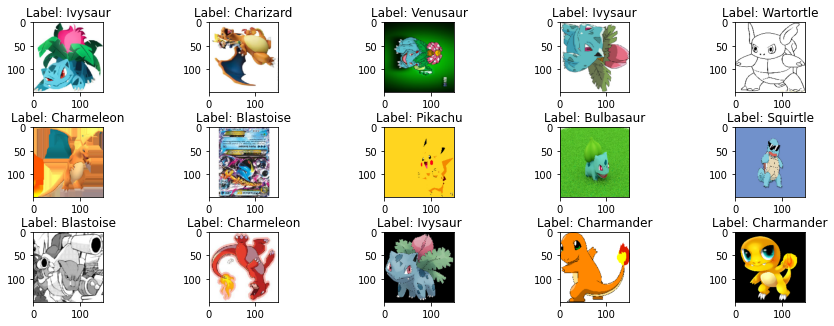

In [ ]:
# Shuffle only training dataset, then split into train, val and test (arrays)
# training is about 150 images per pokemon (assuming 200 images each, choosing a specific CNN arch) [aim for 70% acc on training]
# validation is about 40 images per pokemon (testing hyperparameters, increasing acc from training)
# test is about 10 images per pokemon

plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

np.unique(y)

In [ ]:
# show image grid & labels

In [ ]:
# train model on training dataset
nb = len(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

y_train = np.eye(nb)[y_train]
y_test = np.eye(nb)[y_test]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([228, 152, 156, 232, 152, 468, 213, 391, 165, 234])) (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 68,  49,  48,  57,  53, 118,  67, 110,  41,  64]))


In [ ]:
# tune hyperparameters w/ validation dataset 
# (play with parameters passed and see which give the best results)

img_size = 150
base_model = DenseNet201(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))

for layer in base_model.layers[:675]:
    layer.trainable = False

for layer in base_model.layers[675:]:
    layer.trainable = True

In [ ]:
# once ideal hyperparamters are found, pass in the testing dataset to model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(nb, activation=tf.nn.softmax))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

filepath= "model_pokemon.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

callbacks_list = [
        checkpoint,
        early_stopping,
        learning_rate_reduction
    ]

hist = model.fit(datagen.flow(X_train,y_train,batch_size=32),
                                        validation_data=testgen.flow(X_test,y_test,batch_size=32),
                                        epochs=1,
                                        callbacks=callbacks_list)
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

ground = np.argmax(y_test,axis=1)

  13079/Unknown - 2294s 174ms/step - loss: 0.0413 - accuracy: 0.9863

In [ ]:
# run classification report (skmetrics/tensorflow)
print(classification_report(ground,pred,target_names = labels))

y_pred

y_pred = np.argmax(y_pred,axis=1)
y_pred

y_true = np.argmax(y_test,axis=1)
y_true

In [ ]:
# show wrongly classified images

plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')